In [11]:
# 4.1 
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)

In [12]:
# 4.2 
word_index = imdb.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [13]:
# 4.3
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
    for j in sequence:
        results[i, j] = 1.
 return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [14]:
# 4.4
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
# 4.5
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [15]:
# 4.6
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
# 4.7
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 431ms/step - accuracy: 0.6942 - loss: 0.5963 - val_accuracy: 0.8290 - val_loss: 0.4279
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8881 - loss: 0.3406 - val_accuracy: 0.8777 - val_loss: 0.3166
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9244 - loss: 0.2407 - val_accuracy: 0.8880 - val_loss: 0.2839
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9396 - loss: 0.1897 - val_accuracy: 0.8585 - val_loss: 0.3451
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9446 - loss: 0.1684 - val_accuracy: 0.8883 - val_loss: 0.2803
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9561 - loss: 0.1337 - val_accuracy: 0.8830 - val_loss: 0.2992
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9644 - loss: 0.1164 - val_accuracy: 0.8842 - val_loss: 0.2968
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9720 - loss: 0.0979 - val_accuracy: 0.8628 -

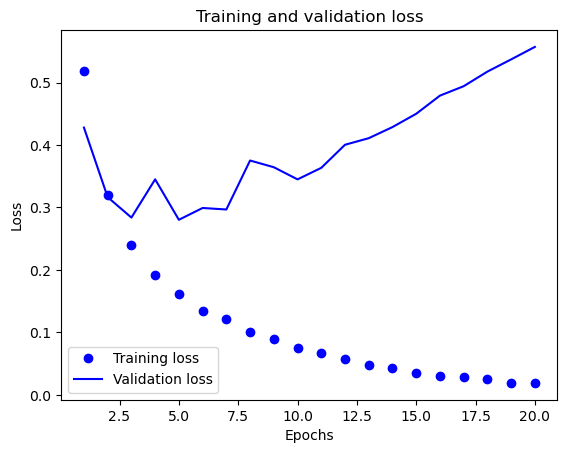

In [17]:
# 4.8
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

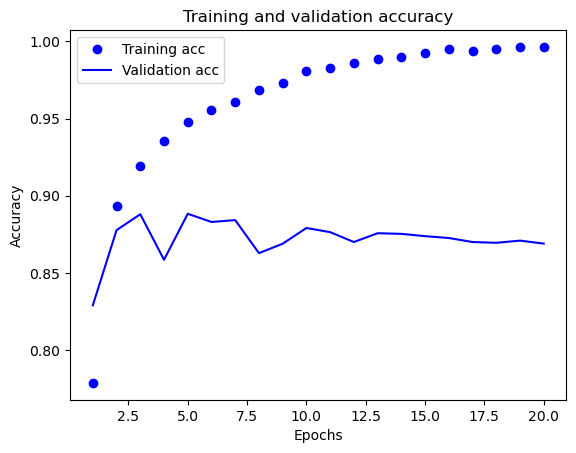

In [18]:
#4.9
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [19]:
#4.10
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7379 - loss: 0.5575
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9027 - loss: 0.2851
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9232 - loss: 0.2195
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9357 - loss: 0.1821
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8796 - loss: 0.2951


In [21]:
#4.11
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
 num_words=10000)

1703936/2110848 ━━━━━━━━━━━━━━━━━━━━ 3:06 458us/step

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/reuters.npz: None -- retrieval incomplete: got only 1697606 out of 2110848 bytes

In [ ]:
#4.12
word_index = reuters.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
 [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [22]:
#4.13
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [23]:
#4.14
def to_one_hot(labels, dimension=46):
 results = np.zeros((len(labels), dimension))
 for i, label in enumerate(labels):
    results[i, label] = 1.
 return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
#4.15
model = keras.Sequential([
 layers.Dense(64, activation="relu"),
 layers.Dense(64, activation="relu"),
 layers.Dense(46, activation="softmax")
])

In [ ]:
#4.16
model.compile(optimizer="rmsprop",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [ ]:
#4.17
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
#4.18
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

In [ ]:
#4.19
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()